In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from src.utils import *

fpath = 'reads.fa'
reads = readSequences(fpath)

print(f'num reads: {len(reads)}')
print(f'lengths reads: {len(reads[0])}')

num reads: 17350
lengths reads: 100


k=10: num nodes=26451, num edges=27829
In Degrees:
[0 1 2 3 4] [    1 25151  1227    68     5]
Out Degrees:
[0 1 2 3 4] [    1 25141  1245    62     3]


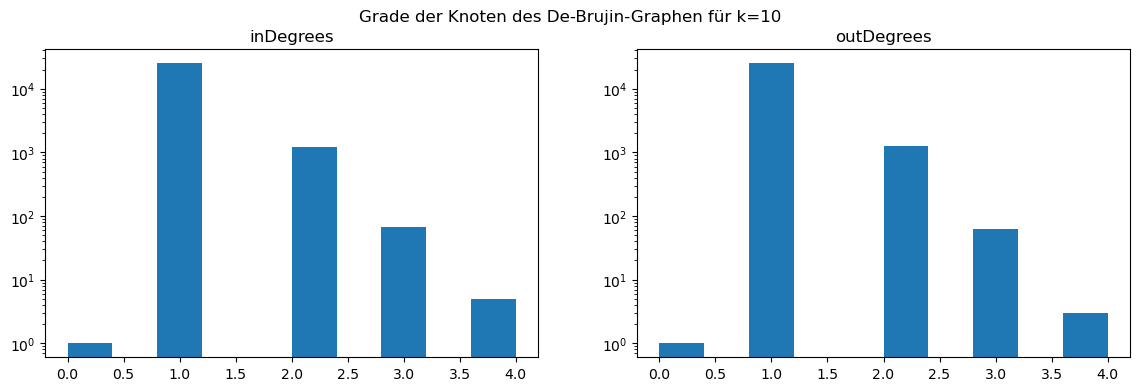

k=20: num nodes=28849, num edges=28857
In Degrees:
[0 1 2] [    1 28841     8]
Out Degrees:
[0 1 2] [    1 28841     8]


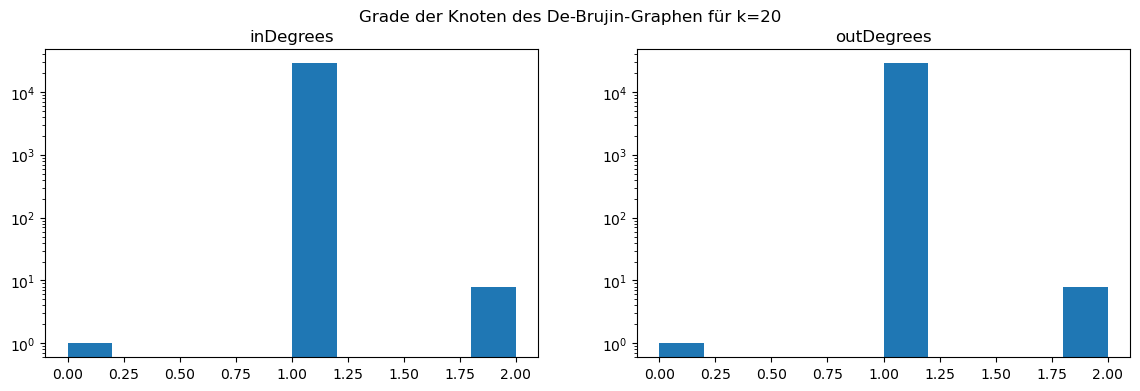

k=30: num nodes=28871, num edges=28872
In Degrees:
[0 1 2] [    1 28870     1]
Out Degrees:
[0 1 2] [    1 28870     1]


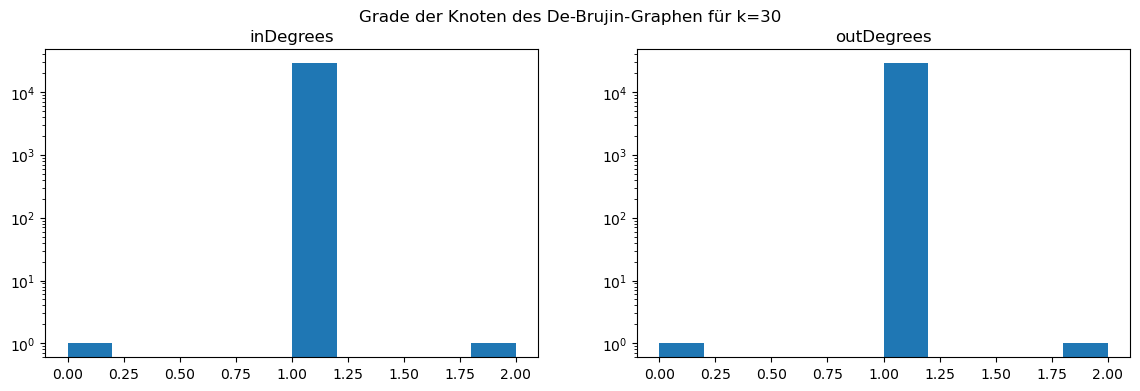

In [2]:
from src.deBrujinGraphAssembly import DeBrujinGraph

for k in [10,20,30]:
    deBrujinGraph = DeBrujinGraph(reads, k)
    graph = deBrujinGraph.graph
    numNodes = len(graph)
    numEdges = sum([sum(graph[node].values()) for node in graph])
    print(f'k={k}: num nodes={numNodes}, num edges={numEdges}')

    degrees = deBrujinGraph.getDegreesNodes()
    degsList = np.array([degrees[node] for node in degrees])

    print('In Degrees:')
    vals, counts = np.unique(degsList[:,0], return_counts=True)
    print(vals, counts)

    print('Out Degrees:')
    vals, counts = np.unique(degsList[:,1], return_counts=True)
    print(vals, counts)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14,4)
    fig.suptitle(f'Grade der Knoten des De-Brujin-Graphen für k={k}')    

    ax1.set_title('inDegrees')
    ax1.set_yscale('log')
    ax1.hist(degsList[:,0])

    ax2.set_title('outDegrees')
    ax2.set_yscale('log')
    ax2.hist(degsList[:,1])

    plt.savefig(f'Plots/hist_nodeDeg_graph_k{k}.png')
    plt.show()





In [1]:
# find assembly
from src.deBrujinGraphAssembly import DeBrujinGraph
from src.deBrujinGraphAssembly import Assembly
import matplotlib.pyplot as plt
import numpy as np

from src.utils import *

fpath = 'reads.fa'
reads = readSequences(fpath)

k=30
graph = DeBrujinGraph(reads, k)
degrees = graph.getDegreesNodes()
# outFileLineLen = 81
assembly = Assembly(graph, degrees, f'reads_assembly_k{k}.fa', outFileLineLen=None)

In [2]:
assembly.findAssemblyEuler()

1 possible start nodes found!
Taking the first one.
Taking the one with smallest degree would be an option (not implemented).
cycle found in euler path!
Greedily appending to assembly.
ATGAATGCTTTAAGGAAACTTCCAATCAAATTACTAATTTGATGTTTTGAAGGTCTATATTTAAATTGTAATGATTGTTTATAATCTAATAATATTTCGTCTAACAATTGACTAGCTTCCATTATGAAATCATTATTGACTAAAGAAACAATAACTTTTTTATAACCAATAAATGGATTAATTTTACCTTTACCTTTACCTTTACCACCAAACAGTTTATATTTAGTATAAGCAGATTCAATCACTTGATAAGTTTGCTCTTTACTTAATAAATCAAATTGAGTAAAATATTTCGACAATTCAAGGATTAATAAATAATAATCTTTATCAGAAATTTTGGCCATTTGAATCAGATTAACAAATGGTTCAATGATTTGTGGTGTAATCAATTTGGGATAATTATATAATAATTTGAGTAAATCGGCAAGTAATGCTTGTAAATCCAATTGACTAGAAATTAATGTGAACAATTCAAGACAAATTTGGGCAAATTCTTGAGATTTACCATGTATTTCATTGTATTGTAAAATATTATCTGTTGGTATATCCAAACATTGTAAACTACCTTTTAATAAAGCAGTTACCACTATATTGTATGTTTCTTTATTGGGTTTTATACCAGCAGCAAGAATATCTTGATAAACCGTTAACAACACAGTTAATTTTCCTTCTATAGAATCTAGTGTTAATTCACTATTCAAACTTCTGTTTAAAATAGATTTGAGAACAATATTGTATACATCAATAGAAGGTAATTTCAAATCGTTTCTTTTCACTGCTTGGTATAATGGGTATATAATGTTTAAGTCGTCAGG

In [ ]:
from src.deBrujinGraphAssembly import DeBrujinGraph
from src.deBrujinGraphAssembly import Assembly
import matplotlib.pyplot as plt
import numpy as np

seq = ['TACACAA', 'ACATCACAA']
#seq = ['TACATCACAA']
k=3
g = DeBrujinGraph(seq, k)
'''for key, edges in g.graph.items():
    print(key)
    for key, val in edges.items():
        print(key,val)
    print()'''
degrees = g.getDegreesNodes()
assembly = Assembly(g, degrees, f'test_assembly_k{k}.fa')
assembly.findAssemblyEuler()

'for key, edges in g.graph.items():\n    print(key)\n    for key, val in edges.items():\n        print(key,val)\n    print()'